# PA1 - Preprocess()

### Initial imports

In [626]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Load matrix

In [627]:
mat = loadmat('./mnist_all.mat')

In [628]:
mat.keys()

['test1',
 'test0',
 'test3',
 'test2',
 'test5',
 'test4',
 'test7',
 'test6',
 'test9',
 'test8',
 'train4',
 'train5',
 'train6',
 'train7',
 'train0',
 'train1',
 'train2',
 'train3',
 '__version__',
 'train8',
 'train9',
 '__header__',
 '__globals__']

In [629]:
# For example train9 is all training images corresponding to the digit 9
train0 = mat.get('train0')
print train0.shape

(5923L, 784L)


### Generate stacked matrix from training and test data

In [630]:
def stackMatrix(type):
    matrix = mat.get(type + str(0))
    label = np.full((1,matrix.shape[0]),0)
    for i in range(1,10):
        nmatrix = mat.get(type + str(i))
        matrix = np.vstack((matrix,nmatrix))
        nlabel = np.full((1,nmatrix.shape[0]),i)
        label = np.hstack((label,nlabel))
    return matrix, label       

In [631]:
trainData, trainLabel = stackMatrix('train')
testData, testLabel = stackMatrix('test')

### Plot 10 random images from trainData

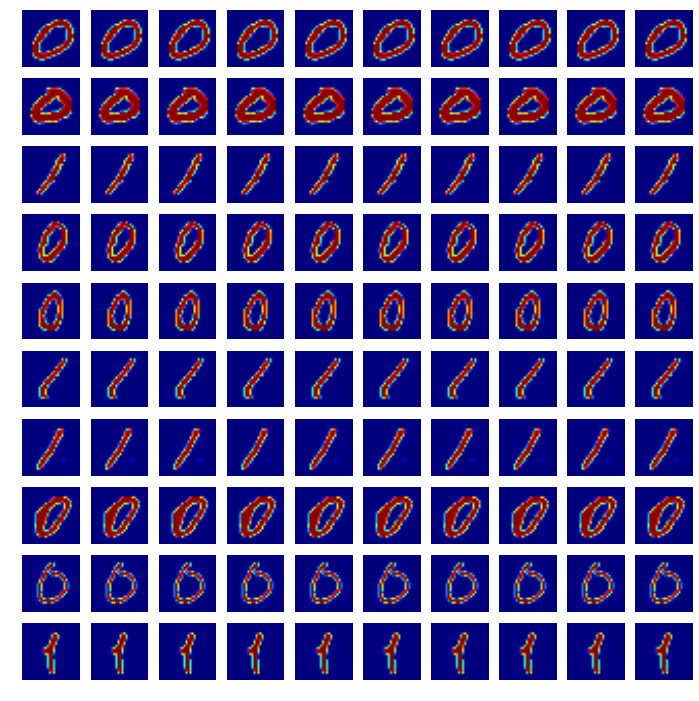

In [632]:
fig = plt.figure(figsize=(12,12))
for i in range(10):
    trainx = trainData[0:10000]
    # note the use of function random.sample to extract 10 rows randomly
    s = random.sample(range(trainx.shape[0]),10)
    for j in range(10):
        plt.subplot(10,10,10*i+j+1)
        row = trainx[s[i],:]
        # note that each row is a flattened image
        # we first reshape it to a 28x28 matrix
        plt.imshow(np.reshape(row,((28,28))))
        plt.axis('off')

### Feature Removal

In [633]:
def removeFeatures(matrix,dims):
    j = 0
    while(j<matrix.shape[1]):
        if(j in dims):
            a = matrix[:,[j]]
            j += 1
            break
        j += 1
    while(j<matrix.shape[1]):
        if(j in dims):
            b = matrix[:,[j]]
            a = np.concatenate((a, b), axis=1)
        j += 1
    return a

In [634]:
dims = []
for j in range(0,trainData.shape[1]):
    change = False
    val = trainData[0][j]
    for i in range(1,trainData.shape[0]):
        if(trainData[i][j] != val):
            change = True
            break
    if(change):
        dims.append(j)
print len(dims)
trainData = removeFeatures(trainData,dims)
#testData = removeFeatures(testData,dims)
print trainData.shape

717
(60000L, 717L)


### Calculate maximum value 

In [635]:
trainMax = trainData.max()
testMax = testData.max()

### Normalize matrices

In [636]:
trainData = trainData/float(trainMax)
testData = testData/float(testMax)
print trainData.max()

1.0


### Split trainData into two random parts

In [637]:
A = trainData
a = range(A.shape[0])
aperm = np.random.permutation(a)
validationData = A[aperm[0:10000],:]
trainData = A[aperm[10000:],:]
print validationData.shape
print trainData.shape

(10000L, 717L)
(50000L, 717L)


### Split trainLabel into two random parts

In [638]:
A = trainLabel
validationLabel = A[:,aperm[0:10000]]
trainLabel = A[:,aperm[10000:]]
print validationLabel.shape
print trainLabel.shape

(1L, 10000L)
(1L, 50000L)
